<b><center><span style="font-size:40px; color:blue;">Exploratory Data Analysis</span></center></b>

<div style="background-color:pink; padding: 20px; border-radius: 5px;">
<center><b style="font-size: 30px; color: blue;">Dataset : 1</b></center><br>
<a href="https://www.kaggle.com/datasets/laotse/credit-risk-dataset" style="font-size: 20px; color: blue;">Public URL : https://www.kaggle.com/datasets/laotse/credit-risk-dataset</a></div>

In [1]:
import pandas as pd
df = pd.read_csv('./datasets/credit_risk_dataset.csv')
df.shape

(32581, 12)

In [2]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]
df.columns

Index(['Person_Age', 'Person_Income', 'Person_Home_Ownership',
       'Person_Emp_Length', 'Loan_Intent', 'Loan_Grade', 'Loan_Amnt',
       'Loan_Int_Rate', 'Loan_Status', 'Loan_Percent_Income',
       'Cb_Person_Default_On_File', 'Cb_Person_Cred_Hist_Length'],
      dtype='object')

In [3]:
df.head(3)

,Person_Age,Person_Income,Person_Home_Ownership,Person_Emp_Length,Loan_Intent,Loan_Grade,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Cb_Person_Default_On_File,Cb_Person_Cred_Hist_Length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


In [4]:
df.describe()

,Person_Age,Person_Income,Person_Emp_Length,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Cb_Person_Cred_Hist_Length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Person_Age                  32581 non-null  int64  
 1   Person_Income               32581 non-null  int64  
 2   Person_Home_Ownership       32581 non-null  object 
 3   Person_Emp_Length           31686 non-null  float64
 4   Loan_Intent                 32581 non-null  object 
 5   Loan_Grade                  32581 non-null  object 
 6   Loan_Amnt                   32581 non-null  int64  
 7   Loan_Int_Rate               29465 non-null  float64
 8   Loan_Status                 32581 non-null  int64  
 9   Loan_Percent_Income         32581 non-null  float64
 10  Cb_Person_Default_On_File   32581 non-null  object 
 11  Cb_Person_Cred_Hist_Length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Person_Age                       0
Person_Income                    0
Person_Home_Ownership            0
Person_Emp_Length              895
Loan_Intent                      0
Loan_Grade                       0
Loan_Amnt                        0
Loan_Int_Rate                 3116
Loan_Status                      0
Loan_Percent_Income              0
Cb_Person_Default_On_File        0
Cb_Person_Cred_Hist_Length       0
dtype: int64


## Demographic and Financial Profile

In [7]:
df['Loan_Status_Str'] = df.Loan_Status.apply(lambda x : 'Nondefault' if x == 0 else 'Default')

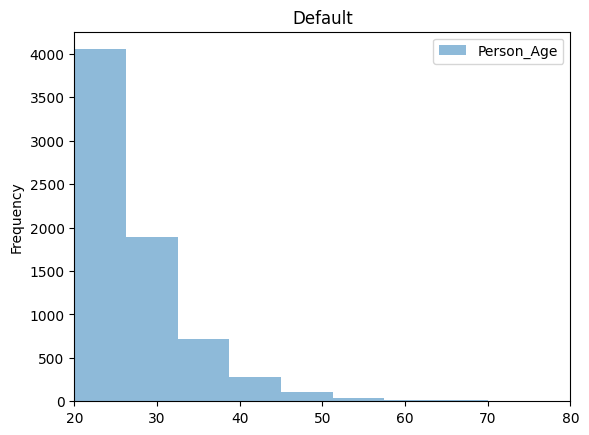

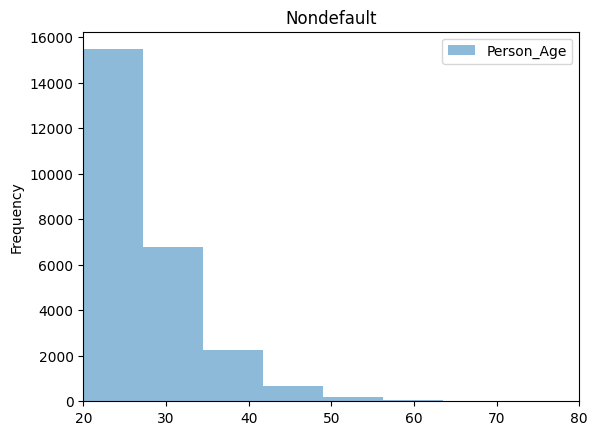

In [8]:
for i in df.Loan_Status_Str.unique():
    df[(df.Loan_Status_Str==i) & (df.Person_Age<80)].Person_Age.to_frame().plot(kind='hist', bins=8, alpha=0.5, xlim=(20,80), title=i)

Person_Income    Axes(0.125,0.11;0.775x0.77)
dtype: object

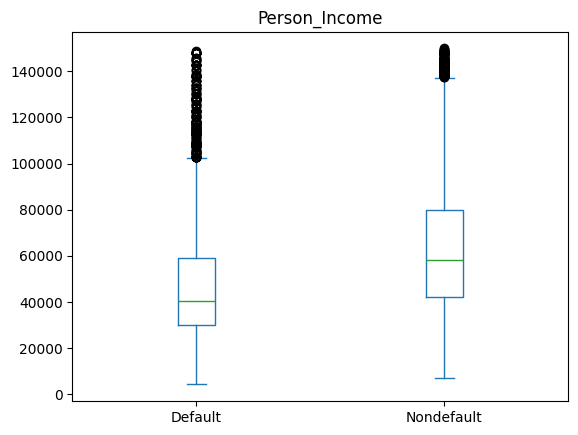

In [9]:
df[df.Person_Income < 150000].plot(kind='box', by='Loan_Status_Str', column='Person_Income')

<Axes: xlabel='Person_Home_Ownership'>

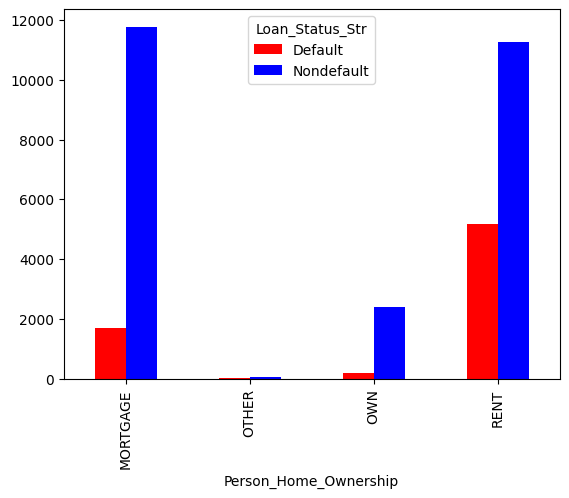

In [10]:
df.groupby(['Person_Home_Ownership','Loan_Status_Str']).Loan_Status_Str.count().unstack().plot(kind='bar', color=['red', 'blue'])  

## Employment and Credit Risk

Person_Emp_Length    Axes(0.125,0.11;0.775x0.77)
dtype: object

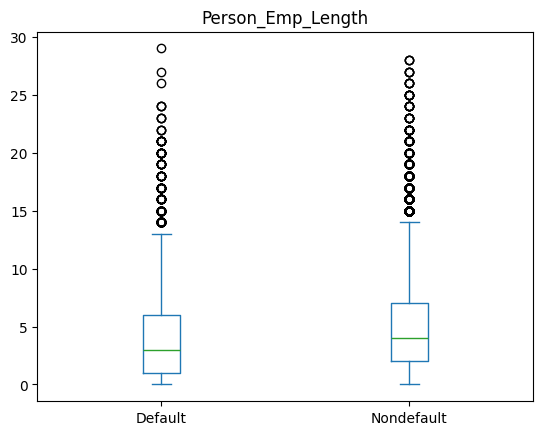

In [11]:
df[df.Person_Emp_Length < 30].plot(kind='box', by='Loan_Status_Str', column='Person_Emp_Length')

## Loan Intent and Default Rate

<Axes: title={'center': 'Loan Default Rate'}, xlabel='Loan_Intent'>

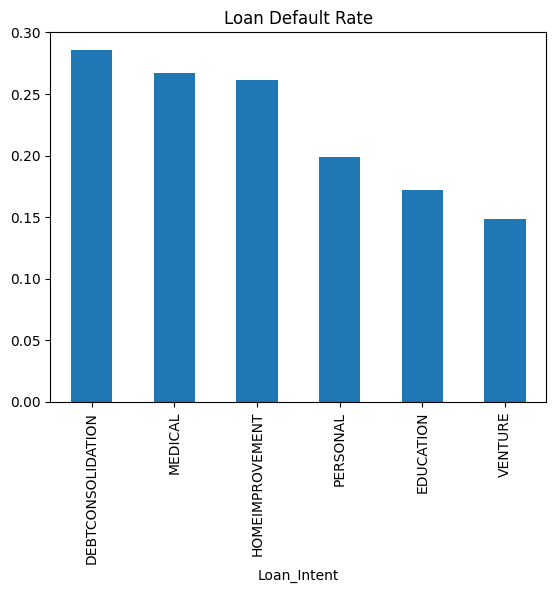

In [12]:
df.groupby(['Loan_Intent','Loan_Status_Str']).Loan_Status_Str.count().unstack().apply(axis=1, func=lambda row : row.Default / (row.Default + row.Nondefault)).sort_values(ascending=False).plot(kind='bar', title='Loan Default Rate')

## Loan Amount and Income

Loan_Percent_Income    Axes(0.125,0.11;0.775x0.77)
dtype: object

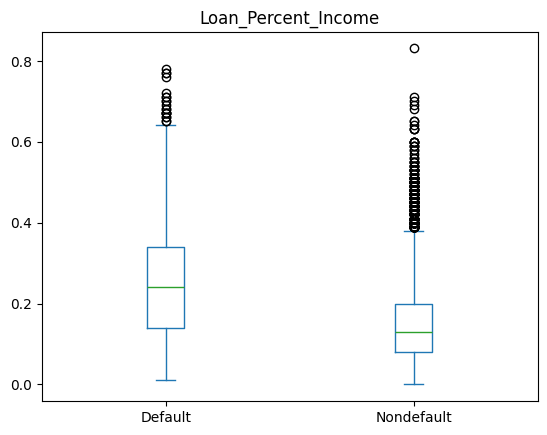

In [13]:
df.plot(kind='box', by='Loan_Status_Str', column='Loan_Percent_Income')

## Interest Rates and Default

Loan_Int_Rate    Axes(0.125,0.11;0.775x0.77)
dtype: object

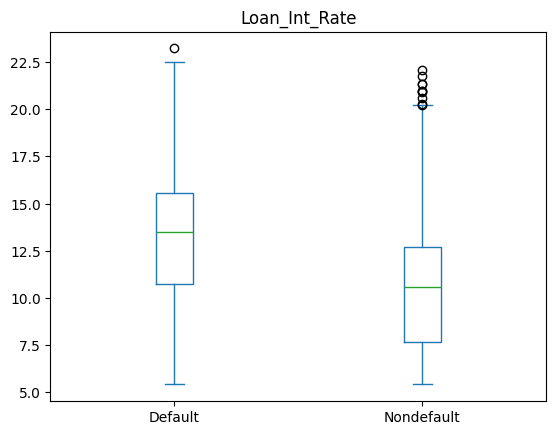

In [14]:
df.plot(kind='box', by='Loan_Status_Str', column='Loan_Int_Rate')

## Credit History Length

Cb_Person_Cred_Hist_Length    Axes(0.125,0.11;0.775x0.77)
dtype: object

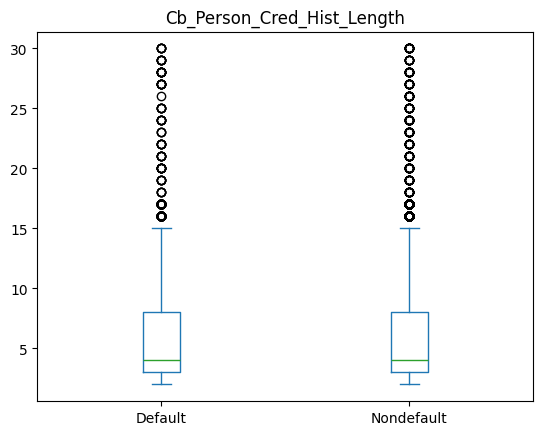

In [15]:
df.plot(kind='box', by='Loan_Status_Str', column='Cb_Person_Cred_Hist_Length')

In [16]:
df.Cb_Person_Cred_Hist_Length.corr(df.Loan_Status)

-0.01552943235399127

## Impact of Home Ownership

## Loan Grade Analysis

<Axes: xlabel='Loan_Grade'>

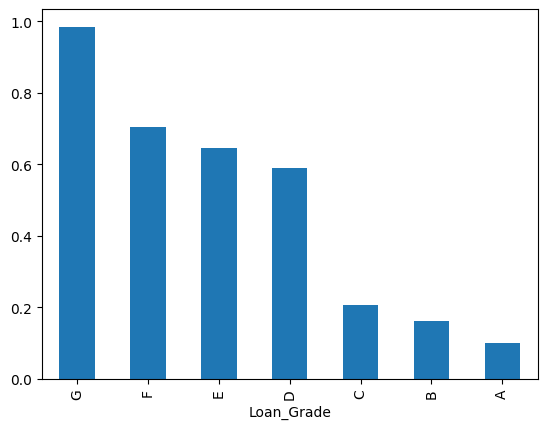

In [17]:
df.groupby(['Loan_Grade']).Loan_Status.mean().sort_values(ascending=False).plot(kind='bar')

## Debt to Income Ratio

In [18]:
Q1 = df.Person_Income.quantile(0.25)
Q3 = df.Person_Income.quantile(0.75)
def income_bracket(x):
    if x < Q1:
        return 'low'
    elif x < Q3:
        return 'medium'
    else:
        return 'high'
df['Income_Bracket'] = df.Person_Income.apply(income_bracket)

In [19]:
def loan_percent_income_group(x):
    return (int((x) * 10) % 10) / 10 + int(x)
df['Loan_Percent_Income_Group'] = df.Loan_Percent_Income.apply(loan_percent_income_group)

In [20]:
df.groupby(['Income_Bracket', 'Loan_Percent_Income_Group'])['Loan_Status'].mean().reset_index()

,Income_Bracket,Loan_Percent_Income_Group,Loan_Status
0,high,0.0,0.065457
1,high,0.1,0.081755
2,high,0.2,0.171707
3,high,0.3,0.324503
4,high,0.4,0.631579
5,low,0.0,0.247359
6,low,0.1,0.257763
7,low,0.2,0.312358
8,low,0.3,0.713855
9,low,0.4,0.786575


In [21]:
_.pivot(index='Loan_Percent_Income_Group', columns='Income_Bracket', values='Loan_Status') 

Income_Bracket,high,low,medium
Loan_Percent_Income_Group,,,
0.0,0.065457,0.247359,0.122996
0.1,0.081755,0.257763,0.135570
0.2,0.171707,0.312358,0.156432
0.3,0.324503,0.713855,0.560843
0.4,0.631579,0.786575,0.641604
0.5,NaN,0.794118,0.742857
0.6,NaN,0.725000,0.777778
0.7,NaN,0.818182,NaN
0.8,NaN,0.000000,NaN


<Axes: xlabel='Loan_Percent_Income_Group'>

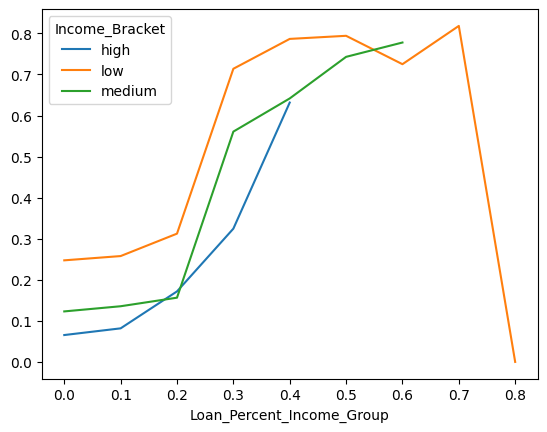

In [22]:
_.plot(kind='line')

## Previous Defaults and Loan Outcomes

<Axes: xlabel='Cb_Person_Default_On_File'>

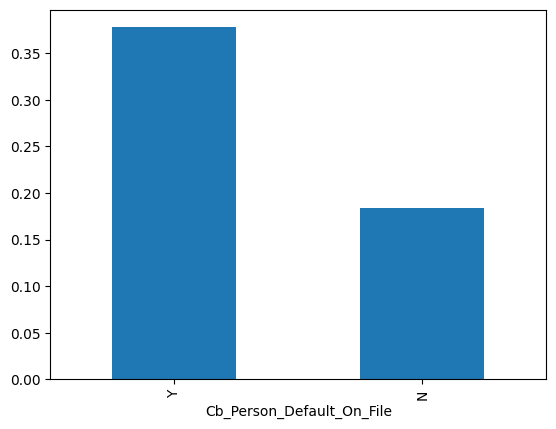

In [23]:
df.groupby(['Cb_Person_Default_On_File']).Loan_Status.mean().sort_values(ascending=False).plot(kind='bar')

<div style="background-color:pink; padding: 20px; border-radius: 5px;">
<center><b style="font-size: 30px; color: blue;">Dataset : 2</b></center><br>
<a href="https://www.kaggle.com/datasets/uciml/german-credit" style="font-size: 20px; color: green;">Public URL : https://www.kaggle.com/datasets/uciml/german-credit</a></div>

In [24]:
dataset= "./datasets/german_credit_data.csv"
df = pd.read_csv(dataset)
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education


In [25]:
# Count the rows
initial_row_count = df.shape[0]
print(initial_row_count)

1000


In [26]:
# Remove rows with any blank cells (NaNs)
df_cleaned = df.dropna()

# Count the rows again
final_row_count = df_cleaned.shape[0]
final_row_count

522

In [27]:
# Print the columns
print("Columns:", df_cleaned.columns.tolist())

Columns: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']


In [28]:
# Print basic statistics of the DataFrame
print("DataFrame Statistics:")
print(df_cleaned.describe(include='all'))

DataFrame Statistics:
        Unnamed: 0         Age   Sex         Job Housing Saving accounts  \
count   522.000000  522.000000   522  522.000000     522             522   
unique         NaN         NaN     2         NaN       3               4   
top            NaN         NaN  male         NaN     own          little   
freq           NaN         NaN   354         NaN     349             412   
mean    493.522989   34.888889   NaN    1.875479     NaN             NaN   
std     291.131014   11.787918   NaN    0.682811     NaN             NaN   
min       1.000000   19.000000   NaN    0.000000     NaN             NaN   
25%     233.500000   26.000000   NaN    2.000000     NaN             NaN   
50%     502.500000   31.500000   NaN    2.000000     NaN             NaN   
75%     736.750000   41.000000   NaN    2.000000     NaN             NaN   
max     999.000000   75.000000   NaN    3.000000     NaN             NaN   

       Checking account  Credit amount    Duration Purpose  
coun

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [30]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


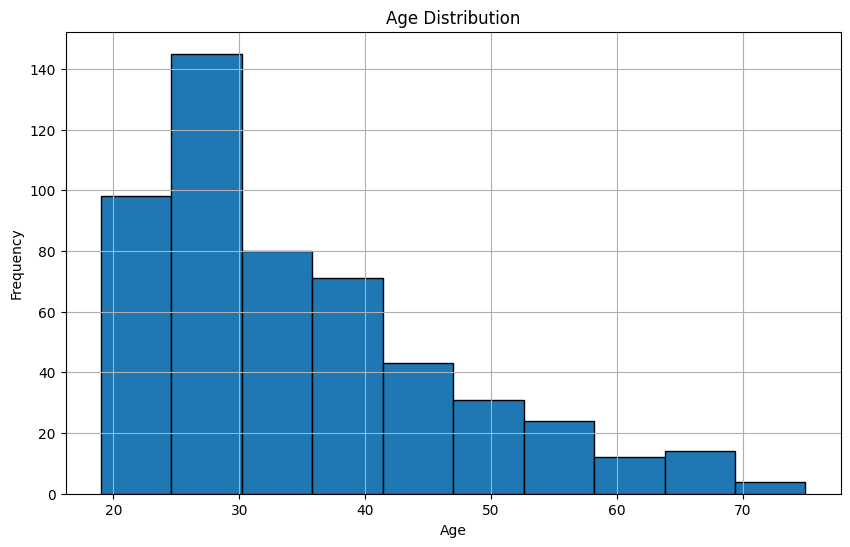

In [31]:
# Create a Age Distribution graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_cleaned['Age'].hist(bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

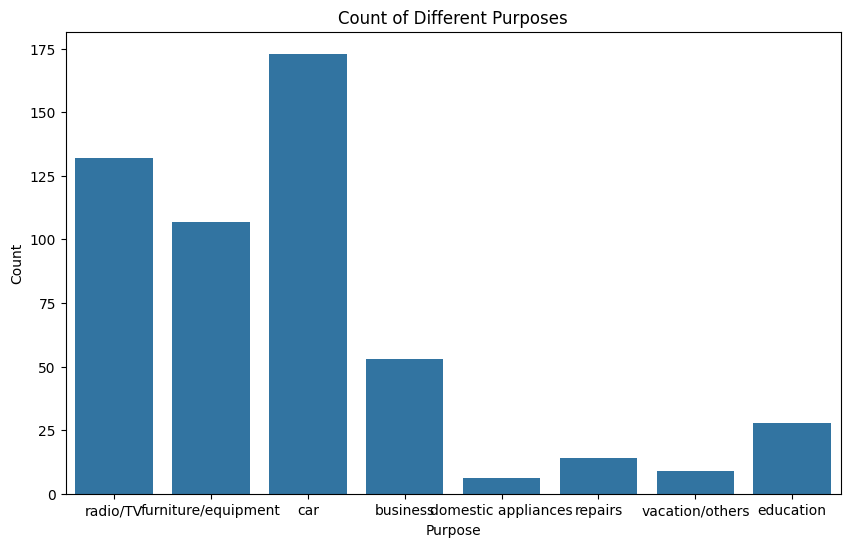

In [32]:
# Countplot for 'Purpose'
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', data=df_cleaned)
plt.title('Count of Different Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

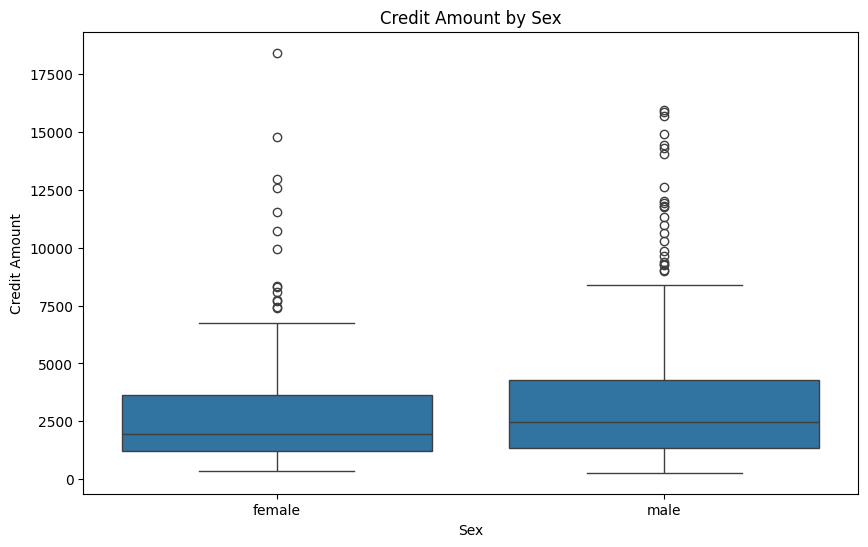

In [33]:
# Boxplot for 'Credit amount' by 'Sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Credit amount', data=df_cleaned)
plt.title('Credit Amount by Sex')
plt.xlabel('Sex')
plt.ylabel('Credit Amount')
plt.show()

<div style="background-color:pink; padding: 20px; border-radius: 5px;">
<center><b style="font-size: 30px; color: blue;">Dataset : 3</b></center><br>
<a href="https://www.kaggle.com/datasets/ritayulfanii/credit-risk-dataset?resource=download" style="font-size: 20px; color: blue;">Public URL : https://www.kaggle.com/datasets/ritayulfanii/credit-risk-dataset?resource=download</a></div>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data into a DataFrame
df = pd.read_csv('./datasets/CreditRisk.csv')
df.head(3)

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines,Credit_Risk
0,744488,607,5,29,3.414,103519,2696,6,Moderate
1,350833,533,8,21,3.737,74868,5336,8,Moderate
2,466037,474,12,25,5.061,93468,1785,4,High


In [35]:
df.shape

(676, 9)

In [36]:
# Basic information and statistics
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       676 non-null    int64  
 1   Credit_Score       676 non-null    int64  
 2   Late_Payments      676 non-null    int64  
 3   Months_In_Job      676 non-null    int64  
 4   Debt_Income_Ratio  676 non-null    float64
 5   Loan_Amt           676 non-null    int64  
 6   Liquid_Assets      676 non-null    int64  
 7   Num_Credit_Lines   676 non-null    int64  
 8   Credit_Risk        676 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 47.7+ KB
None


In [37]:
print("\nDataFrame Description:")
print(df.describe(include='all'))


DataFrame Description:
         Applicant_ID  Credit_Score  Late_Payments  Months_In_Job  \
count      676.000000    676.000000     676.000000     676.000000   
unique            NaN           NaN            NaN            NaN   
top               NaN           NaN            NaN            NaN   
freq              NaN           NaN            NaN            NaN   
mean    548953.392012    613.591716       5.023669      27.445266   
std     245697.572749    117.779891       4.564537      18.935249   
min     139993.000000    397.000000       0.000000       2.000000   
25%     327483.500000    517.000000       1.000000      14.000000   
50%     529909.000000    595.500000       4.000000      23.000000   
75%     760908.500000    723.000000       8.000000      38.000000   
max     980774.000000    826.000000      23.000000     102.000000   

        Debt_Income_Ratio       Loan_Amt  Liquid_Assets  Num_Credit_Lines  \
count          676.000000     676.000000     676.000000        676.000

In [38]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Applicant_ID         0
Credit_Score         0
Late_Payments        0
Months_In_Job        0
Debt_Income_Ratio    0
Loan_Amt             0
Liquid_Assets        0
Num_Credit_Lines     0
Credit_Risk          0
dtype: int64


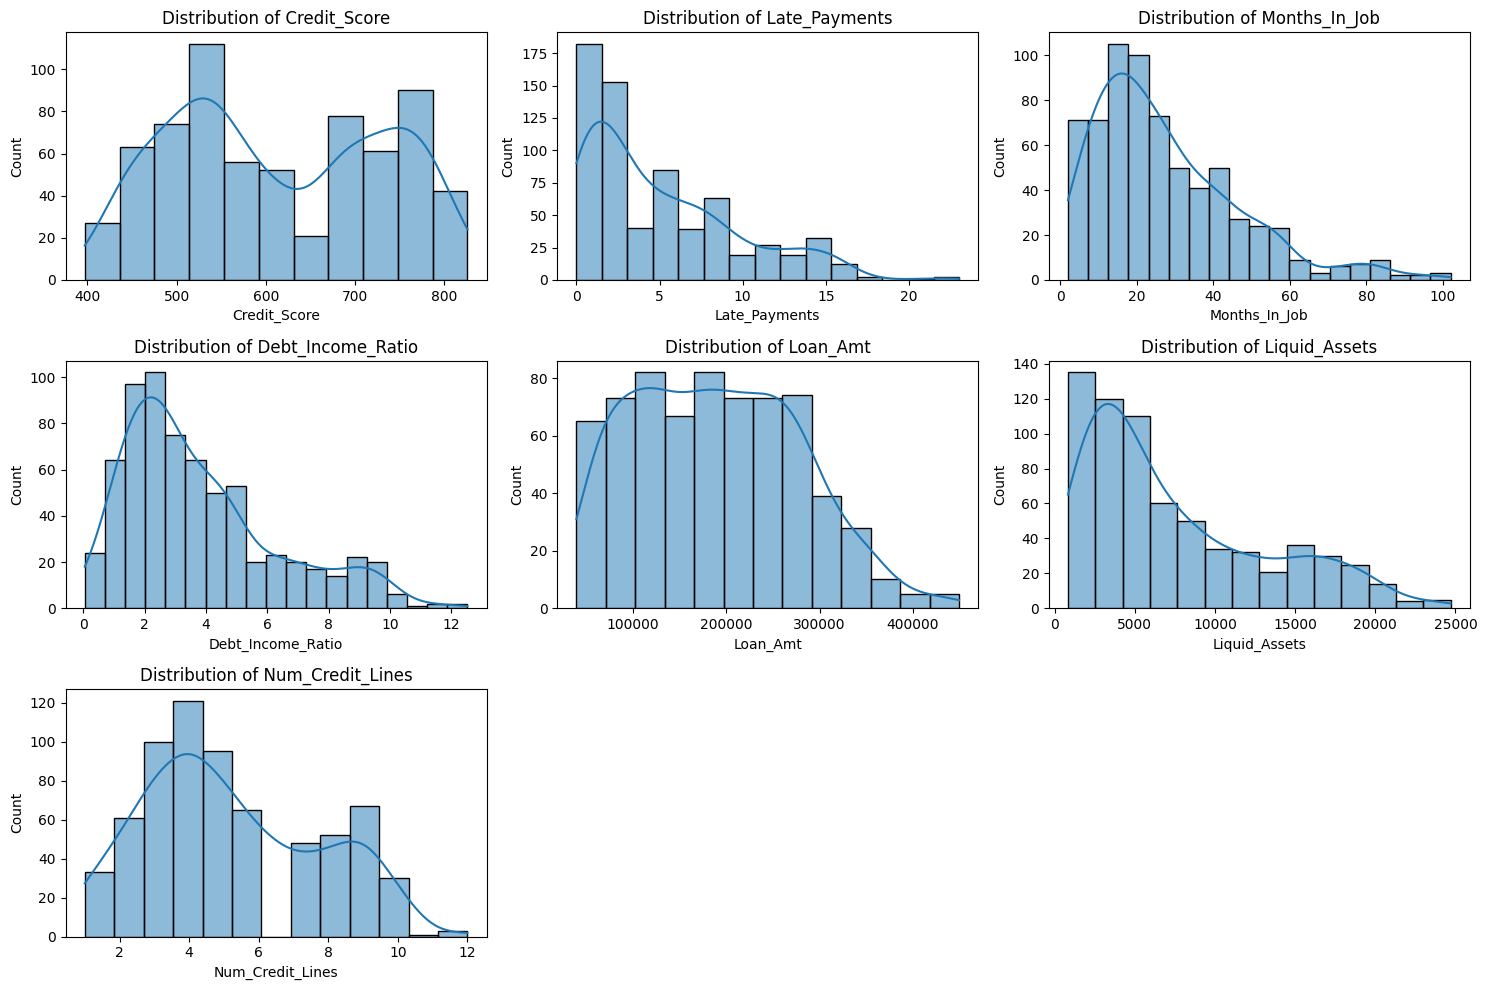

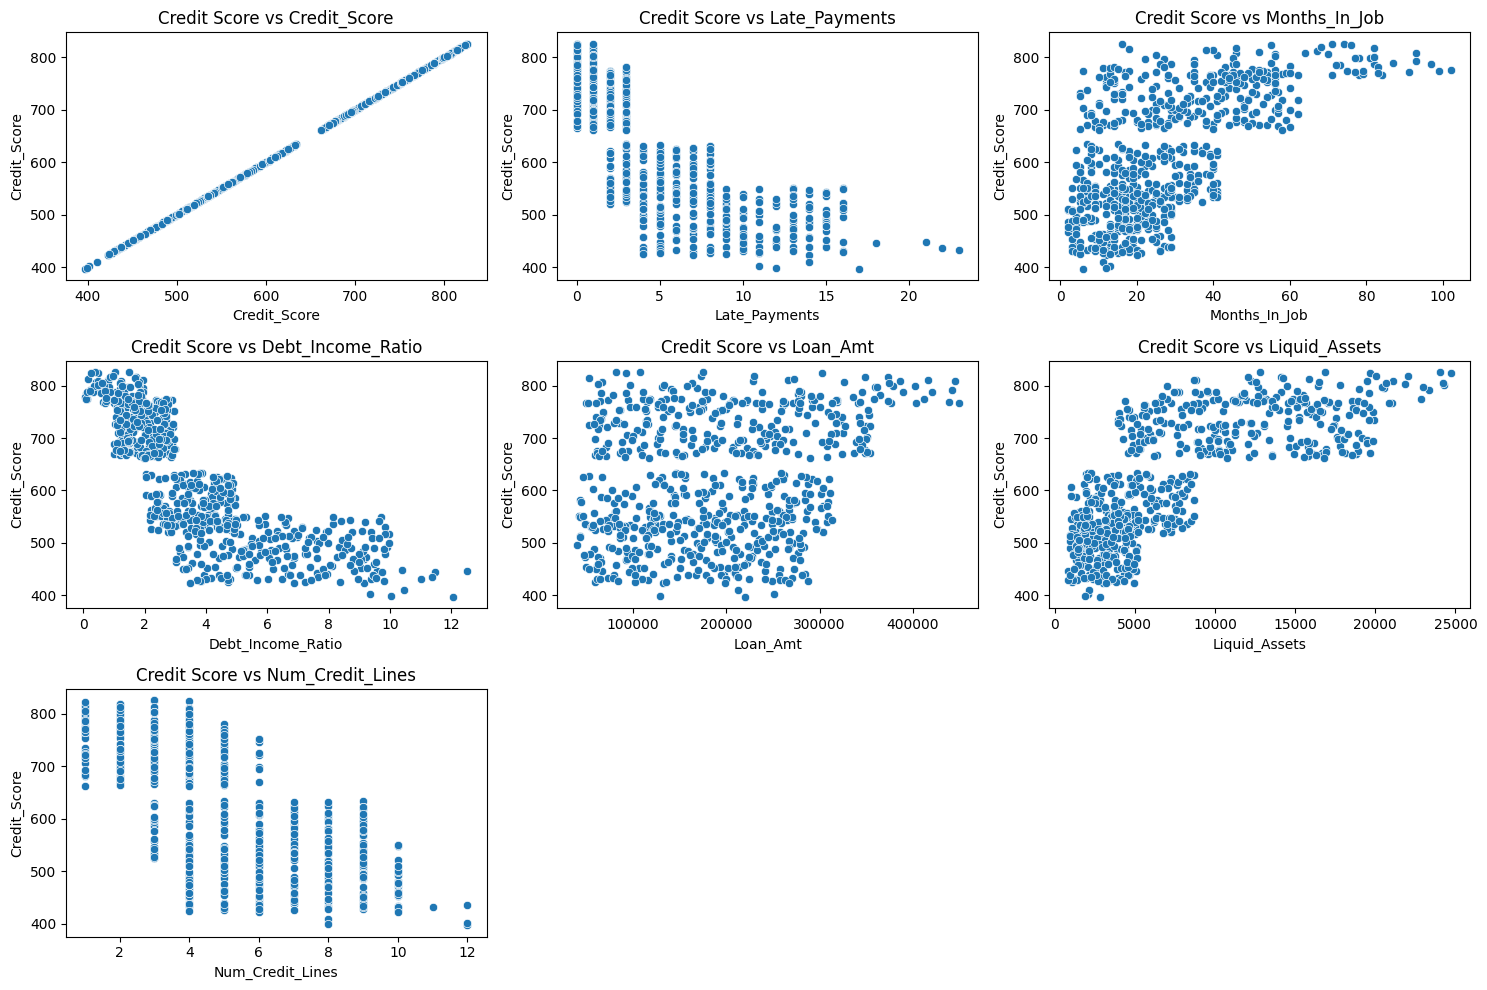

In [39]:
# Distribution of numerical columns
numerical_columns = ['Credit_Score', 'Late_Payments', 'Months_In_Job', 'Debt_Income_Ratio', 'Loan_Amt', 'Liquid_Assets', 'Num_Credit_Lines']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Relationships between numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y='Credit_Score')
    plt.title(f'Credit Score vs {col}')
plt.tight_layout()
plt.show()

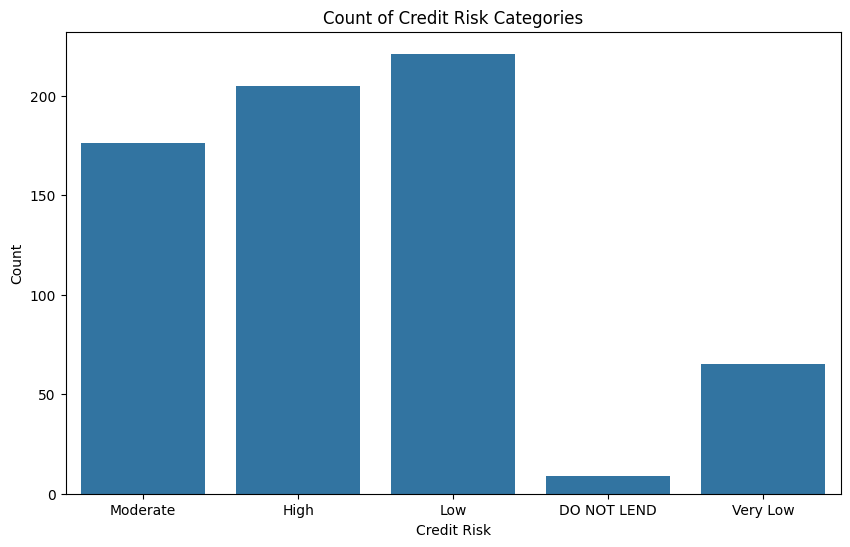

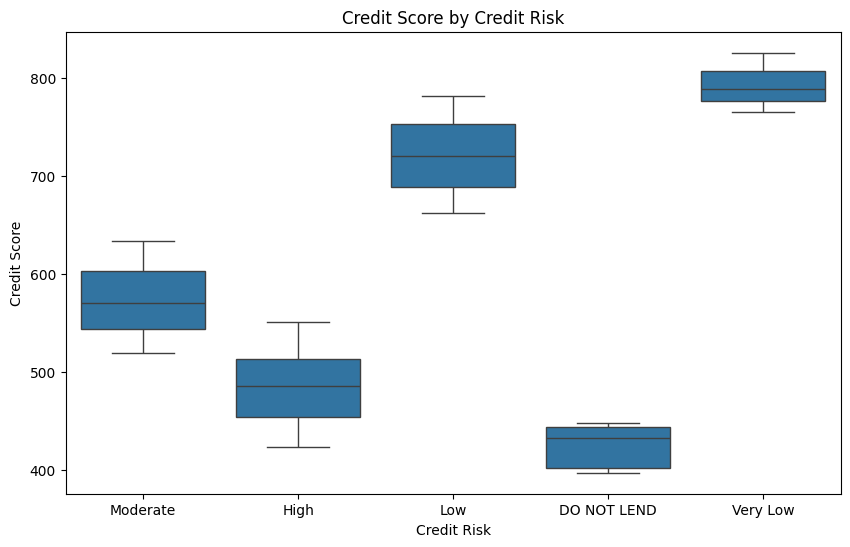

In [40]:
# Analyze categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Risk', data=df)
plt.title('Count of Credit Risk Categories')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.show()

# Boxplot for 'Credit Score' by 'Credit Risk'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Risk', y='Credit_Score', data=df)
plt.title('Credit Score by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Credit Score')
plt.show()

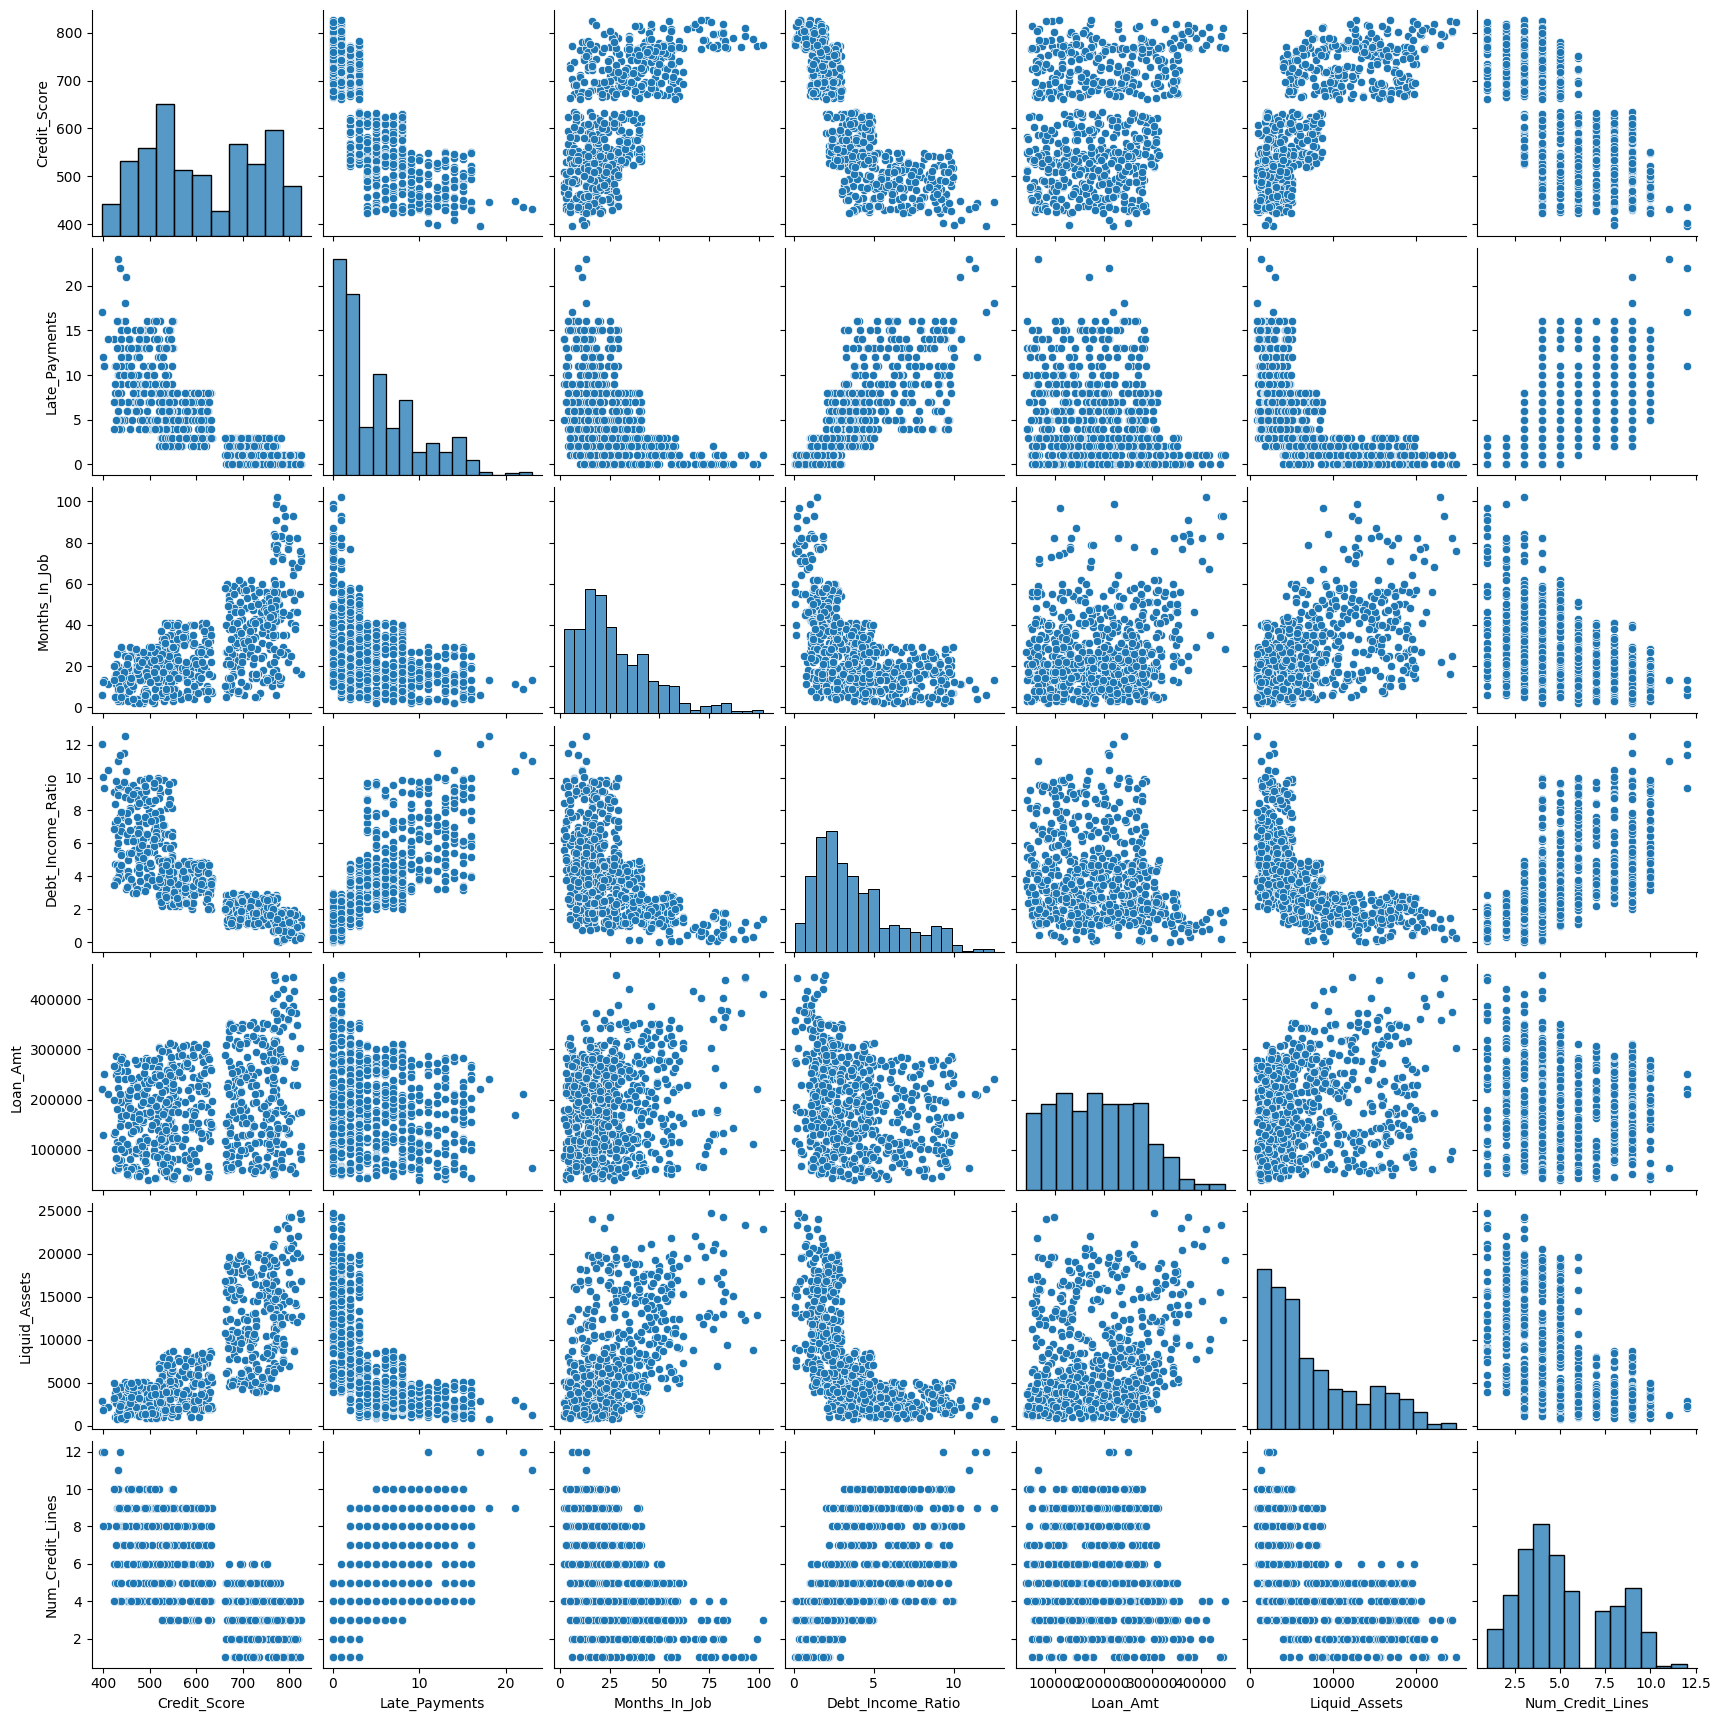

In [41]:
# Pairplot for numerical columns
sns.pairplot(df[numerical_columns])
plt.show()

# <b><center> End of EDA </b></center> 